# Polynomial Regression

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [6]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

(array([16., 11., 12., 12., 10.,  8.,  8.,  7.,  6., 10.]),
 array([8.95825859e-04, 9.91152571e-02, 1.97334688e-01, 2.95554119e-01,
        3.93773551e-01, 4.91992982e-01, 5.90212413e-01, 6.88431844e-01,
        7.86651275e-01, 8.84870707e-01, 9.83090138e-01]),
 <a list of 10 Patch objects>)

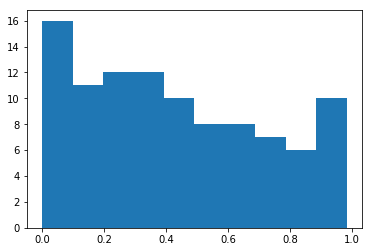

In [7]:
plt.hist(np.random.rand(m, 1))

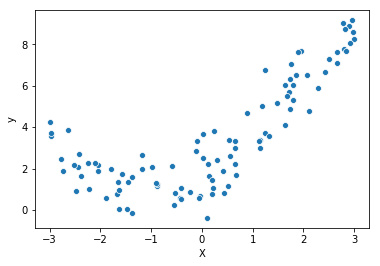

In [8]:
df = pd.DataFrame({'X': list(X), 'y': list(y)})
sns.scatterplot(x='X', y='y', data=df)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
lin_model = LinearRegression()
lin_model.fit(X, y)
y_lin_pred = lin_model.predict(X)
df['y_lin_pred'] = y_lin_pred
print(lin_model.intercept_)
print(lin_model.coef_)

[3.29855883]
[[1.11557834]]


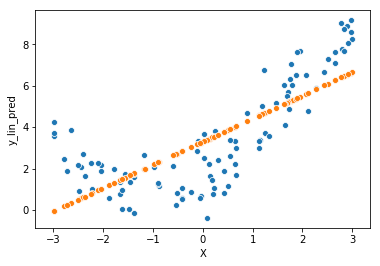

In [11]:
sns.scatterplot(x='X', y='y', data=df)
sns.scatterplot(x='X', y=df['y_lin_pred'], data=df)

## Clearly a straight line will never fit the graph properly

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [33]:
poly_features

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

In [34]:
X_poly = poly_features.fit_transform(X)
X[0]

array([1.25017483])

In [35]:
X_poly[0]

array([1.25017483, 1.56293711])

In [36]:
1.25017483 * 1.25017483

1.5629371055655288

In [37]:
# X_poly now contains X as well as X^2

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

model = LinearRegression()
model.fit(X_poly, y)
print(model.intercept_)
print(model.coef_)

[1.84084161]
[[1.05043041 0.47748382]]


# That is we predict  y = 0.477 * X^2 + 1.05 * X + 1.84

# while the actual is y = 0.5 * X^2 + 1.0 * X + 2.0 + Gaussian noise

In [39]:
y_pred = model.predict(X_poly)
df['y_pred'] = y_pred
df.head()

,X,y,y_lin_pred,y_pred,y_pred20
0,[1.2501748312028829],[3.7402978755334964],4.693227,3.900340,4.171414
1,[1.1382149114879478],[2.9752785471883554],4.568327,3.655053,4.223750
2,[1.7452126629689753],[6.301303323708394],5.245480,5.128371,5.998922
3,[2.9843153143615737],[8.599283345619522],6.627796,9.228194,8.606218
4,[-1.3853720150634659],[-0.12372720114111235],1.753068,1.302018,1.190715


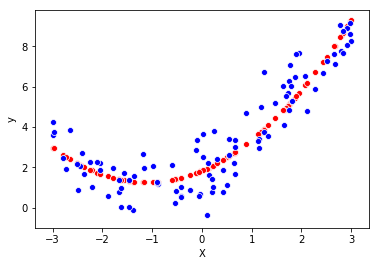

In [40]:
sns.scatterplot(x='X', y=df['y_pred'], data=df, color='red')
sns.scatterplot(x='X', y='y', data=df, color='blue')

## You can fit a higher degree polynomial

In [41]:
poly20 = PolynomialFeatures(degree=20, include_bias=True)
X_poly20 = poly20.fit_transform(X)
model20 = LinearRegression()
model20.fit(X_poly20, y)
y_pred20 = model20.predict(X_poly20)


In [42]:
df['y_pred20'] = y_pred20
df.head()

,X,y,y_lin_pred,y_pred,y_pred20
0,[1.2501748312028829],[3.7402978755334964],4.693227,3.900340,4.171414
1,[1.1382149114879478],[2.9752785471883554],4.568327,3.655053,4.223750
2,[1.7452126629689753],[6.301303323708394],5.245480,5.128371,5.998922
3,[2.9843153143615737],[8.599283345619522],6.627796,9.228194,8.606218
4,[-1.3853720150634659],[-0.12372720114111235],1.753068,1.302018,1.190715


In [43]:
print('Root Mean Squared Error with 1-degree polynomial:', np.sqrt(metrics.mean_squared_error(y, y_lin_pred)))
print('Root Mean Squared Error with 2-degree polynomial:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('Root Mean Squared Error with 20-degree polynomial ', np.sqrt(metrics.mean_squared_error(y, y_pred20)))

Root Mean Squared Error with 1-degree polynomial: 1.6805510445793352
Root Mean Squared Error with 2-degree polynomial: 0.9620469231029486
Root Mean Squared Error with 20-degree polynomial  0.8183514240858651


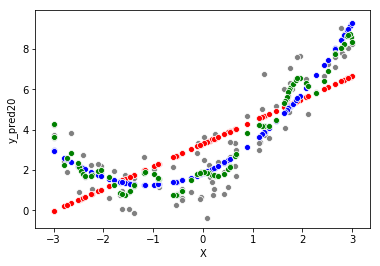

In [46]:
sns.scatterplot(x='X', y='y', data=df, color='gray')
sns.scatterplot(x='X', y=df['y_lin_pred'], data=df, color='red')
sns.scatterplot(x='X', y=df['y_pred'], data=df, color='blue')
sns.scatterplot(x='X', y=df['y_pred20'], data=df, color='green')

## Green line has LOWEST root mean square ERROR than the Red Line

## HOWEVER, Green line may be OVERFITTING while RED line UNDERFIT